# **Principais Algoritmos**

Vamos ver alguns dos mais básicos e principais algoritmos:

- Aprendizado Supervisionado
  - Classificação
    - Naive Bayes
    - k-NN
    - Árvore de Decisão
    - Redes Neurais Artificiais
  - Regressão
    - Regressão Logística
- Aprendizado Não Supervisionado
  - k-Means

## **Naive Bayes**

É um **modelo de classificação** baseado na **probabilidade condicional**.

A partir da Teoria da Decisão Bayesiana podemos calcular, para uma dada observação, qual sua classe mais provável. A partir de um ou mais atributos podemos separar objetos em diferentes classes.

Lembremos do exemplo dos peixes Robalo e Salmão. Suponha que a classe Robalo seja $\omega_{1}$ e a classe Salmão seja $\omega_{2}$ e que o brilho foi observado. *A priori* não sabemos a qual espécie um determinado peixe pertence. Porém, é possível determinarmos sua **probabilidade *a priori***.

A probabilidade *a priori* reflete o quão verossímil é observar uma das duas espécies de peixe. Temos então $P(\omega_{1})$ e $P(\omega_{2})$, ou seja, as probabilidades *a priori* da classe Robalo e da classe Salmão.

Se as probabilidades *a priori* forem diferentes, então podemos ter a seguinte **regra de decisão**:

$\hbox{Decisão} = \left\{\begin{array}{rll}
                \omega_{1}, & \hbox{se} & P(\omega_{1}) > P(\omega_{2}) \\
                \omega_{2}, & \hbox{senão} &
                \end{array}\right.$

Se $P(\omega_{1}) \gg P(\omega_{2})$, então a decisão a favor de $\omega_{1}$ estará correta a maior parte do tempo. Porém, se a quantidade de Salmão é **igual** à quantidade de Robalo, então é igualmente verossímil observar um Salmão ou Robalo, e a regra de decisão acima tem apenas 50% de chance de estar correta.

Existe como melhorar essa regra de decisão? Sim, com a utilização de **probabilidade condicional**.

### **Probabilidade Condicional**

Lembremos que temos conhecidas não somente a quantidade de amostras por classe, mas também observações de atributos. Supondo que o brilho observado do peixe tenha sido $x$, então teoricamente podemos calcular as densidades condicionais $p(x|\omega_{j})$, sendo $j = 1, 2$. O termo $p(x|\omega_{j})$ é lido como *probabilidade de x dado a classe $\omega{j}$*. Em outras palavras, a densidade condicional calcula o quão provável é determinado valor de atributo em cada classe.

Junto à densidade condicional temos a **densidade de probabilidade conjunta**, ou seja, a probabilidade associada às duas variáveis ao mesmo tempo: $p(\omega_{j}, x)$.

### **Teorema de Bayes**

Chegamos, então, finalmente ao **Teorema de Bayes**:

$p(\omega_{j},x) = P(\omega_{j} | x)p(x) = p(x | \omega_{j})P(\omega_{j})$

$\hspace{38pt} \vdots$

$P(\omega_{j} | x) = \dfrac{p(x | \omega_{j})P(\omega_{j})}{p(x)}$

Em palavras: $posteriori = \dfrac{\hbox{verossimilhança} \times priori}{\hbox{evidência}}$

* $posteriori$: Observando-se $x$ pode-se passar a probabilidade *a priori* $P(\omega_{j})$ para a probabilidade *a posteriori* $P(\omega_{j}|x)$, a qual lê-se como *a probabilidade da classe ser $\omega_{j}$ dado que observou-se $x$*.
* $verossimilhança$: Indica que a classe $\omega_{j}$ para o qual $p(x|\omega_{j})$ é maior, é mais verossímil ser a verdadeira classe.
* $evidência$: Fator de escala que garante que a soma das probabilidades *a posteriori* é igual a 1.

### **Classificação**

A partir dos cálculos probabilísticos uma regra de decisão tem de ser escolhida. Uma regra bastante comum é escolher a hipótese mais provável, de forma a minimizar a probabilidade de erro de classificação. Essa regra é conhecida como *máximo a posteriori*:

$\hat{y} = \underset{k \in \{1,...,K\}}{argmax}P(C_{k})\prod\limits^{n}_{i = 1}p(x_{i} | C_{k})$

onde

* $\hat{y}$: classificação/resultado;
* $argmax$: argumento máximo, ou seja, o maior valor;
* $K$: quantidade de classes, ou seja, K classes;
* $C_{k}$: classe k, em que $k=1,...,K$;
* $P(C_{k})$: probabilidade da classe k;
* $p(x_{i} | C_{k})$: probabilidade da observação $x_{i}$ dada a classe k;
* $n$: quantidade de observações.

---

Um exemplo simples para vermos o Naive Bayes em ação:

* Usuários costumam avaliar *designs* preliminares de produtos. Anteriormente, 95% dos produtos de alto sucesso receberam boas notas, 60% dos produtos de sucesso moderado receberam botas notas, e 10% dos produtos de baixo sucesso receberam notas notas. Além disso, 40% dos produtos tiveram alto sucesso, 35% tiveram sucesso moderado e 25% tiveram baixo sucesso.
  * Qual a probabilidade de um produto ter uma boa nota?
  * Se um uno *design* recebe uma boa nota, qual é a probabilidade de que ele venha a ter um alto sucesso?
  * Se um produto não tem uma boa nota, qual é a probabilidade de ele vir a ter um alto sucesso?

Começamos por identificar as informações:
- **A** = Alto sucesso;
- **M** = Médio sucesso;
- **B** = Baixo sucesso;
- **N** = Nota boa;
- **N'** = Noa ruim.

Então montamos um gráfico:

![Exemplo Bayes](imagens/questao2.png)

Agora fazemos os cálculos.

* Probabilidade de um produto ter uma boa nota:
  * P(N) = P(N|A)P(A) + P(N|M)P(M) + P(N|B)P(B) = 0,615.
* Probabilidade de ter um alto sucesso se receber nota boa
  * P(A|N) = $\dfrac{\hbox{P(N|A)P(A)}}{\hbox{P(N)}}$ = 0,618.
* Probabilidade de ter um alto sucesso se receber nota ruim
  * P(A|N') = $\dfrac{\hbox{P(N'|A)P(A)}}{\hbox{P(N')}} \rightarrow \hbox{P(N')}$?
  * P(N') = P(N'|A)P(A) + P(N'|M)P(M) + P(N'|B)P(B) = 0,385
  * $\therefore$ P(A|N') = 0,052.

---

A versão mais simples de classificação com Teorema de Bayes implementada no [Scikit Learn](https://scikit-learn.org/stable/index.html) é a [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB), a qual assume que a distribuição dos dados é Gaussiana.

![desvio padrão](imagens/std_diagram.svg)

A classificação é da seguinte forma:

$P(x_{i}|y) = \dfrac{1}{\sqrt{2\pi\sigma^{2}_{y}}}exp(-\dfrac{(x_{i} - \mu_{y})^{2}}{2\sigma^{2}_{y}})$

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Quantidade de amostras erroneamente classificadas de um total de %d: %d"
    % (X_test.shape[0], (y_test != y_pred).sum()))

Quantidade de amostras erroneamente classificadas de um total de 75: 4


In [12]:
print("Real\t | \tClassificado")

for i, j in zip(y_test, y_pred):
    print(i,"\t | \t",j)

Real	 | 	Classificado
2 	 | 	 2
1 	 | 	 1
0 	 | 	 0
2 	 | 	 2
0 	 | 	 0
2 	 | 	 2
0 	 | 	 0
1 	 | 	 1
1 	 | 	 1
1 	 | 	 1
2 	 | 	 1
1 	 | 	 1
1 	 | 	 1
1 	 | 	 1
1 	 | 	 1
0 	 | 	 0
1 	 | 	 1
1 	 | 	 1
0 	 | 	 0
0 	 | 	 0
2 	 | 	 2
1 	 | 	 1
0 	 | 	 0
0 	 | 	 0
2 	 | 	 2
0 	 | 	 0
0 	 | 	 0
1 	 | 	 1
1 	 | 	 1
0 	 | 	 0
2 	 | 	 2
1 	 | 	 1
0 	 | 	 0
2 	 | 	 2
2 	 | 	 2
1 	 | 	 1
0 	 | 	 0
1 	 | 	 1
1 	 | 	 1
1 	 | 	 1
2 	 | 	 2
0 	 | 	 0
2 	 | 	 2
0 	 | 	 0
0 	 | 	 0
1 	 | 	 1
2 	 | 	 2
2 	 | 	 2
2 	 | 	 1
2 	 | 	 2
1 	 | 	 1
2 	 | 	 2
1 	 | 	 1
1 	 | 	 1
2 	 | 	 2
2 	 | 	 1
2 	 | 	 1
2 	 | 	 2
1 	 | 	 1
2 	 | 	 2
1 	 | 	 1
0 	 | 	 0
2 	 | 	 2
1 	 | 	 1
1 	 | 	 1
1 	 | 	 1
1 	 | 	 1
2 	 | 	 2
0 	 | 	 0
0 	 | 	 0
2 	 | 	 2
1 	 | 	 1
0 	 | 	 0
0 	 | 	 0
1 	 | 	 1


## **k-NN**

k *Nearest Neighbors* ou k *Vizinhos mais Próximos*. A estimação da classe de uma amostrada é baseada na probabilidade *a posteriori*.

![knn](imagens/knn.png)

P(vermelho) = 2/5 $\therefore$ P(preto) = 3/5.

O valor de $k$ pode variar:

![k variando](imagens/knn_desafio.png)

Como observar a vizinhança?

* Distância Euclidiana (mais comum);
  * $d = \sqrt{\sum^{d}_{i=1}(p_{i} - q_{i})^{2}}$
  * Exemplo: $a_{1} = (1, 1); a_{2} = (4,5)$
    * $d(a_{1}, a_{2}) = \sqrt{(1 - 4)^{2} + (1 - 5)^{2}} = \sqrt{9 + 16} = 5$

Após observar a distância de um ponto a todos os outros, é possível saber quem são os mais próximos, e suas respectivas classes. A classificação ocorre através de voto por maioria, ou seja, a classe mais presente entre os vizinhos é escolhida para classificar a amostra.

No Scikit Learn, podem ser utilizados outros algoritmos para buscar os vizinhos mais próximos (veja na documentação).

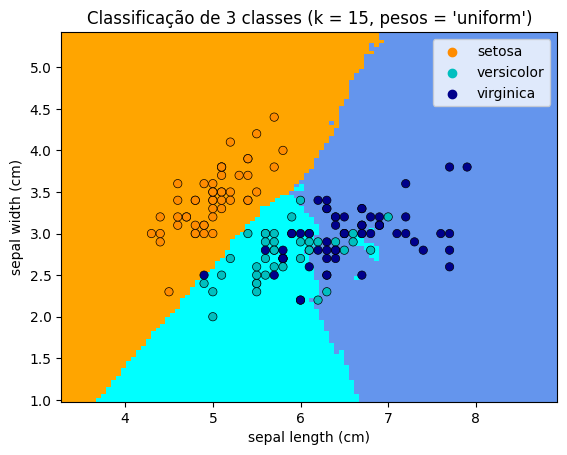

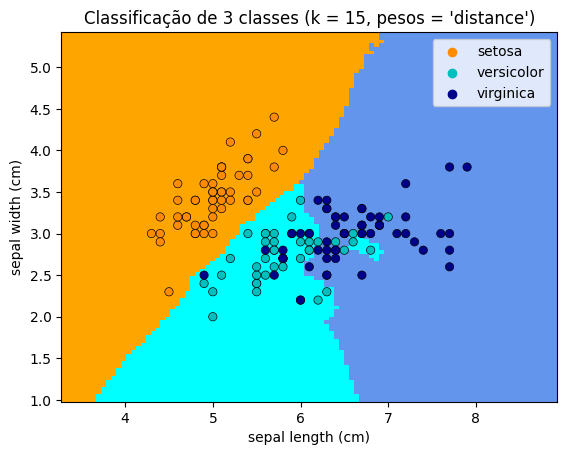

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_vizinhos = 15

iris = datasets.load_iris()

# Pegando apenas os primeiros 2 atributos (por questões de plot)
X = iris.data[:, :2]
y = iris.target

# Criando mapas de cor
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_vizinhos, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict",
        plot_method="pcolormesh", xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1], shading="auto",
    )

    # Plotando também as amostras de treino
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

    plt.title(
        "Classificação de 3 classes (k = %i, pesos = '%s')" % (n_vizinhos, weights)
    )

plt.show()

## **Árvore de Decisão**

Segundo Mitchell[^1] **Árvore de Decisão** é um método para **aproximação de funções** com **valores discretos**, onde a função aprendida é representada por uma árvore de decisão.

[^1]: Tom M. Mitchell. Machine Learning. ISBN: 0070428077. McGraw-Hill Science/Engineering/Math, mar. de 1997.

![árvore de decisão](imagens/arvore_visual.png)

Termos técnicos de uma árvore:

![árvore termos](imagens/arvore_termos.png)

* Como construir?
  * Ideia base:
    1. Escolher um atributo;
    2. Estender a árvore adicionando um ramo para cada valor do atributo;
    3. Passar os exemplos para as folhas (tendo em conta o valor do atributo escolhido);
    4. Para cada folha
       1. Se todos os exemplos são da mesma classe, associar essa classe à folha
       2. Senão, repetir os passos 1 a 4.
* Como escolher o melhor atributo?
  * Um atributo deve ser o mais discriminante possível!

### **Algoritmo ID3** (*Iterative Dichotomiser 3*)

Para escolher o melhor atributo é feito um cálculo estatístico conhecido como **ganho de informação**:

$G(S,A) \equiv Entropia(S) - \sum\limits_{v \in Valores(A)}\dfrac{|S_{v}|}{|S|}Entropia(S_{v})$

onde,

* $Entropia$ é uma medida que caracteriza a pureza ou impureza de um conjunto arbitrário.
  * Seja um conjunto $S$ contendo duas classes, uma positiva ($p_{\oplus} =$ proporção de exemplos positivos) e uma negativa ($p_{\ominus} =$ proporção de exemplos negativos).
  * A entropia de S é: $Entropia(S) \equiv -p_{\oplus}log_{2}p_{\oplus} - p_{\ominus}log_{2}p_{\ominus}$ ou $Entropia(S) \equiv \sum\limits_{i=1}^{c} - p^{}_{i}log^{}_{2}p^{}_{i}$.
  * Exemplo: $S$ = 14 exemplos [9+, 5-]
    * Entropia(S) = Entropia([9+, 5-]) = -(9/14)$log_{2}$(9/14) - (5/14)$log_{2}$(5/14) = 0,940.
* $Valores(A)$ é o conjunto de todos os valores possíveis para o atributo $A$;
* $S_{v}$ é o subconjunto de $S$ para o qual o atributo $A$ tem valor $v$.

#### **Exemplo ilustrativo**

| Dia | Tempo | Temperatura | Umidade | Vento | Jogar |
|---|---|---|---|---|---|
| D1 | Ensolarado | Quente | Alta | Forte | Não |
| D2 | Ensolarado | Quente | Alta | Forte | Não |
| D3 | Nublado | Quente | Alta | Fraco | Sim |
| D4 | Chuvoso | Média | Alta | Fraco | Sim |
| D5 | Chuvoso | Frio | Normal | Fraco | Sim |
| D6 | Chuvoso | Frio | Normal | Forte | Não |
| D7 | Nublado | Frio | Normal | Forte | Sim |
| D8 | Ensolarado | Média | Alta | Fraco | Não |
| D9 | Ensolarado | Frio | Normal | Fraco | Sim |
| D10 | Chuvoso | Média | Normal | Fraco | Sim |
| D11 | Ensolarado | Média | Normal | Forte | Sim |
| D12 | Nublado | Média | Alta | Forte | Sim |
| D13 | Nublado | Quente | Normal | Fraco | Sim |
| D14 | Chuvoso | Média | Alta | Forte | Não |

$S$ = [9 Sim, 5 Não] $\rightarrow$ Entropia = 0,940

**Atributo**: Tempo = [Ensolarado, Nublado, Chuvoso]

$S_{Ensolarado}$ = [2+, 3-];
$S_{Nublado}$ = [4+, 0-];
$S_{Chuvoso}$ = [3+, 2-];

$G(S,A) \equiv Entropia(S) - \sum\limits_{v \in Valores(A)}\dfrac{|S_{v}|}{|S|}Entropia(S_{v})$

$G(S, Tempo) \equiv 0,940 - (5/14)Entropia(S_{Ensolarado}) - (4/14)Entropia(S_{Nublado}) - (5/14)Entropia(S_{Chuvoso})$

$G(S, Tempo) \equiv 0,940 - (5/14)0,971 - (4/14)0 - (5/14)0,971 \equiv 0,246$

$\vdots$

$G(S, Tempo) = 0,246$ | $G(S, Temperatura) = 0,029$ | $G(S, Umidade) = 0,151$ | $G(S, Vento) = 0,048$

![árvore exemplo](imagens/arvore_exemplo.png)

**Próximo atributo**

$S_{Ensolarado}$ = [D1, D2, D8, D9, D11]

$G(S_{Ensolarado}, Umidade) = 0,970 - (3/5)0 - (2/5)0 = 0,970$

$G(S_{Ensolarado}, Temperatura) = 0,970 - (2/5)0 - (2/5)1 - (1/5)0 = 0,570$

$G(S_{Ensolarado}, Vento) = 0,970 - (2/5)1 - (3/5)0,918 = 0,019$

### **Implementação com Scikit Learn**

O ID3 foi criado por Ross Quinlan em 1986. Foi evoluído para C4.5 e então para C5.0, entretanto possui licença proprietária. O algoritmo de árvore de decisão implementada no scikit-learn (e também na maioria dos demais materiais) é o CART (*Classification and Regression Tree*), o qual é bastante similar ao C4.5.

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

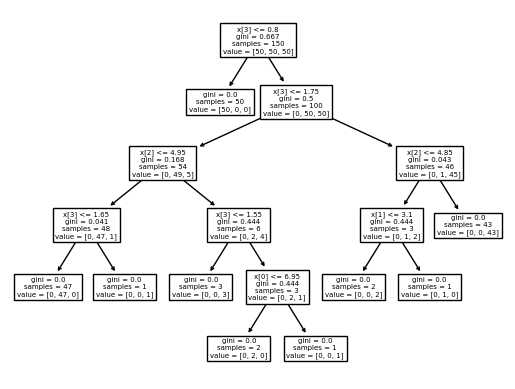

In [18]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

X,y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf)

In [22]:
# Mostrando a árvore em formato textual

from sklearn.tree import export_text

texto = export_text(clf, feature_names=iris['feature_names'])
print(texto)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## **Redes Neurais Artificiais**

> Redes Neurais Artificiais (RNAs) são sistemas paralelos distribuídos compostos por unidades de processamento simples (nodos) que calculam determinadas funções matemáticas (normalmente não-lineares). Tais unidades são dispostas em uma ou mais camadas interligadas por um grande número de conexões, geralmente unidirecionais. Na maioria dos modelos estas conexões estão associadas a pesos, os quais armazenam o conhecimento representado no modelo e servem para ponderar a entrada recebida por cada neurônio da rede. O funcionamento destas redes é inspirado em uma estrutura física concebida pela natureza: o cérebro humano.

<p style="text-align: right">BRAGA, A. P.; LUDERMIR, T. B.; CARVALHO, A. P. L. F. Redes Neurais Artificiais: Teoria e Aplicações. LTC Editora, 2000.</p>

Existem **VÁRIAS** RNAs, e vamos ver duas das mais básicas e comuns: Perceptron e MLP (*Multilayer Perceptron*).

### **Perceptron**

Consiste em apenas um único neurônio artificial, o qual recebe várias entradas, é capaz de processá-las e retorna uma saída.

![neurônio artificial](imagens/neuronio.png)

* Sinais de entrada: $\{x_{1}, x_{2}, x_{3}, ..., x_{n}\}$
* Pesos sinápticos: $\{w_{1}, w_{2}, w_{3}, ..., w_{n}\}$
* Combinador linear: $\Sigma$
* Limiar de ativação: $\theta$
* Potencial de ativação: $u = \sum^{n}_{i=1}w_{i} \cdot x_{i} - \theta$
* Função de ativação: $g(.)$
* Sinal de saída: $y = g(u)$

#### **Funcionamento Básico**

1. Cada entrada é um valor. Multiplique cada entrada pelo peso correspondente;
2. Faça a combinação de todas as entradas (já multiplicadas com os pesos) com o limiar de ativação. A combinação é a soma de todos os valores.
3. Execute a função de ativação. Essa função tem como entrada a combinação das entradas e limiar de ativação. A partir do valore recebido a função vai retornar outro valor. Por exemplo: se o valor for $\ge$ 0 a função retorna 1, senão, retorna 0. O retorno dessa função é justamente a saída $y$.
4. Se o aprendizado for supervisionado e a saída estiver errada, ajuste os pesoas de acordo com alguma função escolhida.

#### **Exemplo**

Dada uma rede do tipo Perceptron formada por um neurônio com três terminais de entrada, utilizando os pesoas iniciais $w_{0} = 0,4$, $w_{1} = -0,6$ e $w_{2} = 0,6$, limiar $\theta = 0,5$ e uma tada de aprendizado $\eta = 0,4$. Resolva as seguintes questões:

* Ensinar a rede a gerar a saída -1 para o padrão 001 e a saída +1 para o padrão 110.
* A que classe pertencem os padrões 111, 000, 100 e 011?

Perceba que são três entradas: **0**, **0** e **1** ou **1**, **1** e **0**. Lembre também que o limiar de ativação é multiplicado por -1, ou seja, podemos considerar que $\theta$ também é um peso associado.

A função de ativação $g(u)$ que utilizaremos vai retornar +1 se a combinação for $\ge$ 0, e -1 se a combinação for $<$ 0.

Por fim, temos uma taxa de aprendizado, a qual será utilizada na função de ajuste de pesos. Comecemos.

* Padrão **001**. Saída desejada $d = -1$
  * u = 0(0,4) + 0(-0,6) + 1(0,6) - 1(0,5) = 0,1. Temos $y = g(u) = +1$, uma vez que $0,1 \ge 0$).
  * Atualização dos pesos 
    * $w_{n} = w_{n} + \Delta w_{n}$, onde $w_{n}$ é o peso $n$ e $\Delta w_{n} = \hbox{\textit{taxa de aprendizado}} \cdot entrada \cdot erro$. 
    * E o $erro = \hbox{\textit{saída desejada}} - \hbox{\textit{saída real}}$. 
    * Ou seja: $\Delta w_{n} = \eta \cdot x_{n} \cdot (d - y)$.
  * Atualizando os pesos:
    * $w_{0} = 0,4 + 0,4 \cdot 0 \cdot (-1 - (+1)) = 0,4$
    * $w_{1} = -0,6 + 0,4 \cdot 0 \cdot (-1 - (+1)) = -0,6$
    * $w_{2} = 0,6 + 0,4 \cdot 1 \cdot (-1 - (+1)) = -0,2$
    * $w_{\theta} = 0,5 + 0,4 \cdot -1 \cdot (-1 - (+1)) = 1,3$
* Padrão **110**. Saída desejada: $d = +1$
  * u = 1(0,4) + 1(-0,6) + 0(-0,2) - 1(1,3) = -1,5. Temos $y = g(u) = -1$, uma vez que $-1,5 < 0$
  * Atualizando os pesos
    * $w_{0} = 0,4 + 0,4 \cdot 1 \cdot (1 - (-1)) = 1,2$
    * $w_{1} = -0,6 + 0,4 \cdot 1 \cdot (1 - (-1)) = 0,2$
    * $w_{2} = -0,2 + 0,4 \cdot 0 \cdot (1 - (-1)) = -0,2$
    * $w_{\theta} = 1,3 + 0,4 \cdot -1 \cdot (1 - (-1)) = 0,5$
* Novamente o padrão **001** (pois só temos ele e o outro para treinamento). Saída desejada $d = -1$
  * u = 0(1,2) + 0(0,2) + 1(-0,2) - 1(0,5) = -0,7. Temos $y = g(u) = -1$, uma vez que $-0,7 < 0$
  * Como $d = y$ não há necessidade de atualizar os pesos.
* Novamente o padrão **110**. Saída desejada: $d = +1$
  * u = 1(1,2) + 1(0,2) + 0(-0,2) - 1(0,5) = 0,9. Temos $y = g(u) = +1$, uma vez que $0,9 \ge 0$.
  * Como $d = y$ não há necessidade de atualizar os pesos.

Agora vamos verificar a qual classe pertencem os padrões **111**, **000**, **100** e **011**.

* Padrão **111**
  * u = 1(1,2) + 1(0,2) + 1(-0,2) -1(0,5) = 0,7 $\therefore$ y = +1
* Padrão **000**
  * u = 0(1,2) + 0(0,2) + 0(-0,2) -1(0,5) = -0,5 $\therefore$ y = -1
* Parão **100**
  * u = 1(1,2) + 0(0,2) + 0(-0,2) -1(0,5) = 0,7 $\therefore$ y = +1
* Padrão **011**
  * u = 0(1,2) + 1(0,2) + 1(-0,2) -1(0,5) = -0,5 $\therefore$ y = -1

#### **Utilizando Scikit-Learn**

Exemplo retirado de https://python-course.eu/machine-learning/perceptron-class-in-sklearn.php.

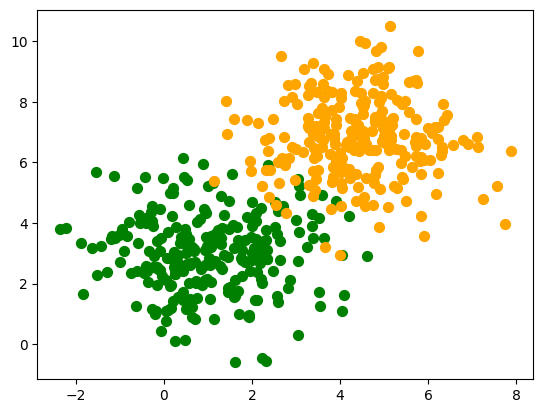

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 500
data, labels = make_blobs(n_samples=n_samples,
                          centers=([1.1, 3], [4.5, 6.9]),
                          cluster_std=1.3,
                          random_state=0)
colors = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0],
               data[labels==n_class][:, 1],
               c=colors[n_class],
               s=50,
               label=str(n_class))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

datasets = train_test_split(data, labels, test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

p = Perceptron(random_state=42)
p.fit(train_data, train_labels)

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("Taxa de acerto no treinamento: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("Taxa de acerto no teste: ", test_score)

Taxa de acerto no treinamento:  0.95
Taxa de acerto no teste:  0.96


### **MLP**

Um Perceptron só é capaz de treinar sobre problemas cuja solução seja linearmente separável. Isso faz com que problemas (até simples) sejam impossíveis de serem resolvidos:

![perceptron 1](imagens/perceptron_1.png) ![perceptron 2](imagens/perceptron_2.png)

![perceptron 3](imagens/perceptron_3.png) ![perceptron 4](imagens/perceptron_4.png)

Solução: mais neurônios em redes com uma ou mais camadas escondidas/intermediárias. Duas camadas intermediárias são suficientes para a aproximação de qualquer função.

![mlp](imagens/mlp.png)

O MLP funciona de forma semelhante ao Perceptron (pesos, função de ativação, etc.), entretanto, fica em aberto quantas camadas e quantos neurônios em cada camada escondida são necessários/suficientes. Além disso fica também em aberto como os neurônios vão se ligar (a abordagem mais comum: completamente ligados).

Por fim, o aprendizado, ou seja, a atualização dos pesos é mais complexa (o algoritmo Backpropagation foi o que salvou as RNAs de terem sido descartadas na década de 80).

[Vídeo de uma aplicação de MLP](https://www.youtube.com/watch?v=NZlIYr1slAk).

#### Utilizando Scikit-Learn

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

clf = MLPClassifier(random_state=1).fit(X_train, y_train)

print("Taxa de acerto: ", clf.score(X_test, y_test))

0.9736842105263158


/home/evandrojrsilva/Workspaces/Estacio_CEUT/Disciplinas/ARA0168/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
